<a href="https://colab.research.google.com/github/netphoenix/ds_belhard/blob/main/hw5/ds_hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №5 «Data Science начальный уровень»

**Author**: Скробат Александр (tg @FlamePhnx)

Реализовать минимум 5 регрессоров, сравнить метрики между собой, выбрать лучший для Вашего датасета. Можно использовать любой свой датасет.
Регрессоры:<br>
✓ Регрессор Gradient Boosting.<br>
✓ Регрессор LGBM.<br>
✓ Экстремальный градиентный бустинг.<br>
✓ Регрессор Extra Trees.<br>
✓ Регрессор случайного леса.<br>
✓ Регрессор CatBoost.<br>
✓ Регрессор AdaBoost.<br>
✓ Регрессия Лассо.<br>
✓ Гребневая регрессия.<br>
✓ Байесовская регрессия.<br>
✓ Линейная регрессия.<br>
✓ Регрессор Губера.<br>
✓ Регрессор дерева решений.<br>
✓ Ортогональный поиск соответствия.<br>
✓ Пассивно-агрессивный регрессор.<br>
✓ Регрессор K-ближайших соседей.<br>
✓ Фиктивный регрессор.<br>
✓ Elastic Net.<br>
✓ Ансамбль регрессоров.<br>
Дополнительно использовать make_classification

In [76]:
!pip install -q catboost lightgbm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Модели
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from catboost import CatBoostRegressor

# Утилиты для предобработки и оценки
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import make_classification

# Настроим стиль графиков для лучшей визуализации
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Глобальные настройки форматирования
pd.set_option('display.max_colwidth', 100)
# Снимаем ограничение на ширину вывода (чтобы не было переноса \)
pd.set_option('display.width', None)
# Снимаем ограничение на количество отображаемых столбцов (чтобы не было многоточия ...)
pd.set_option('display.max_columns', None)

  [Описание датасета](https://www.kaggle.com/datasets/harunrai/fintech-customer-life-time-value-ltv-dataset)

Этот набор данных помогает прогнозировать Пожизненную Ценность Клиента (LTV) для пользователей digital wallets. Набор данных содержит около 7000 записей с 20 разнообразными признаками, которые охватывают демографические данные клиентов, историю транзакций, показатели вовлеченности, шаблоны использования приложения, взаимодействие со службой поддержки и т.д.

Ключевые признаки:
```
Customer_ID: Уникальный идентификатор каждого клиента.
Age: Возраст клиента, от 18 до 70 лет.
Location: Географическое местоположение клиента: Городское, Пригородное или Сельское.
Income_Level: Уровень дохода клиента: Низкий, Средний или Высокий.
Total_Transactions: Общее количество транзакций, совершенных клиентом.
Avg_Transaction_Value: Среднее значение каждой транзакции в рупиях.
Total_Spent: Общая сумма, потраченная клиентом в рупиях.
Max_Transaction_Value: Наибольшее значение одной транзакции в рупиях.
Min_Transaction_Value: Наименьшее значение одной транзакции в рупиях.
Active_Days: Количество дней, в течение которых клиент был активен на платформе.
Last_Transaction_Days_Ago: Сколько дней прошло с последней транзакции клиента.
Loyalty_Points_Earned: Общее количество бонусных баллов, заработанных клиентом.
Referral_Count: Количество новых клиентов, привлеченных данным пользователем.
Cashback_Received: Общий полученный кэшбэк.
App_Usage_Frequency: Частота использования приложения: Ежедневно, Еженедельно или Ежемесячно.
Preferred_Payment_Method: Наиболее часто используемый способ оплаты.
Support_Tickets_Raised: Количество обращений в службу поддержки, созданных клиентом.
Issue_Resolution_Time: Среднее время решения проблем клиента в часах.
Customer_Satisfaction_Score: Оценка удовлетворенности клиента (от 1 до 10).
LTV: Целевая переменная, представляющая расчетную Пожизненную Ценность клиента.
```



In [3]:
import kagglehub
import subprocess

path = kagglehub.dataset_download("harunrai/fintech-customer-life-time-value-ltv-dataset")

print("Path to dataset files:", path)
# !ls {path}

# Выполняем команду ls и получаем список файлов в path
result = subprocess.run(['ls', path], stdout=subprocess.PIPE, text=True)
# Вывод результата в переменную в виде строки
files_list = result.stdout.strip()
print("Файлы в папке:", files_list)
file_path = f"{path}/{files_list}"
print(file_path)

Using Colab cache for faster access to the 'fintech-customer-life-time-value-ltv-dataset' dataset.
Path to dataset files: /kaggle/input/fintech-customer-life-time-value-ltv-dataset
Файлы в папке: digital_wallet_ltv_dataset.csv
/kaggle/input/fintech-customer-life-time-value-ltv-dataset/digital_wallet_ltv_dataset.csv


In [89]:
full_df = pd.read_csv(file_path)
print("FinTech Customer Life Time Value dataset -  rows:",full_df.shape[0]," columns:", full_df.shape[1])

FinTech Customer Life Time Value dataset -  rows: 7000  columns: 20


In [ ]:
full_df.head()

,Customer_ID,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
0,cust_0000,54,Urban,Low,192,16736.384023,60216.834510,6525.814861,3.213386e+06,140,209,2114,25,2224.012140,Monthly,Debit Card,3,61.568590,1,3.279546e+05
1,cust_0001,67,Suburban,High,979,14536.734683,48350.100272,2186.742245,1.423146e+07,229,240,2960,20,4026.823518,Monthly,UPI,17,60.392889,8,1.437053e+06
2,cust_0002,44,Urban,High,329,7061.372800,32521.157187,2743.406808,2.323192e+06,73,21,3170,0,1441.011395,Monthly,Debit Card,11,45.305579,4,2.419387e+05
3,cust_0003,30,Rural,High,71,16426.876453,17827.896720,4360.784994,1.166308e+06,299,285,4756,35,4365.855580,Weekly,Wallet Balance,6,22.030191,1,1.284599e+05
4,cust_0004,58,Urban,Middle,878,10800.092660,17497.634534,4532.872520,9.482481e+06,236,329,1992,18,4161.523827,Daily,UPI,18,20.634723,5,9.569514e+05


In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  7000 non-null   object 
 1   Age                          7000 non-null   int64  
 2   Location                     7000 non-null   object 
 3   Income_Level                 7000 non-null   object 
 4   Total_Transactions           7000 non-null   int64  
 5   Avg_Transaction_Value        7000 non-null   float64
 6   Max_Transaction_Value        7000 non-null   float64
 7   Min_Transaction_Value        7000 non-null   float64
 8   Total_Spent                  7000 non-null   float64
 9   Active_Days                  7000 non-null   int64  
 10  Last_Transaction_Days_Ago    7000 non-null   int64  
 11  Loyalty_Points_Earned        7000 non-null   int64  
 12  Referral_Count               7000 non-null   int64  
 13  Cashback_Received 

In [ ]:
full_df.describe()

,Age,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7.000000e+03
mean,42.633714,501.221429,9946.831482,30159.596784,2981.549953,5.002022e+06,181.934857,183.847714,2501.545429,24.837000,2496.525032,10.017571,36.528007,5.479000,5.119197e+05
std,15.516036,286.277311,5780.880831,21996.108793,2197.342161,4.390495e+06,105.102598,105.063709,1446.680026,14.560352,1440.651412,6.037067,20.389399,2.860197,4.390551e+05
min,16.000000,1.000000,10.185827,31.857484,4.617966,1.498144e+03,1.000000,1.000000,0.000000,0.000000,0.234349,0.000000,1.019853,1.000000,3.770495e+03
25%,29.000000,252.000000,4907.466790,12224.329366,1233.066226,1.363991e+06,90.000000,93.000000,1254.750000,12.000000,1269.423703,5.000000,19.127302,3.000000,1.482058e+05
50%,43.000000,506.000000,9841.172643,25469.392130,2473.181073,3.756105e+06,182.000000,184.000000,2466.000000,25.000000,2478.943350,10.000000,36.257396,5.000000,3.878180e+05
75%,56.000000,744.000000,14955.048801,44515.414177,4378.759195,7.645508e+06,273.000000,275.000000,3792.250000,37.000000,3749.375251,15.000000,54.068594,8.000000,7.748578e+05
max,69.000000,1000.000000,19996.445086,98809.241533,9917.028823,1.946773e+07,365.000000,365.000000,5000.000000,50.000000,4999.698480,20.000000,71.978946,10.000000,1.956988e+06


In [63]:
# Проверим, есть ли пропущенные данные

total = full_df.isnull().sum().sort_values(ascending = False)
percent = (full_df.isnull().sum()/full_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Customer_ID,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
# Удалим ненужный столбец Customer_ID, он не несет полезной информации для регрессии.
full_df = full_df.drop('Customer_ID', axis=1)
# эти признаки явно лишние
features_to_remove = [
    'Total_Spent',
    'Total_Transactions',
    'Avg_Transaction_Value'
]
full_df = full_df.drop(columns=features_to_remove, errors='ignore')


In [91]:
# Задаем параметры для генерации
n_samples_to_generate = len(full_df) # Количество строк должно совпадать
n_features_for_generation = 5        # Количество "фоновых" признаков для генерации классов
n_classes = 4                        # Создадим 4 синтетических типа клиентов (0, 1, 2, 3)

# Генерируем данные с помощью make_classification
# Мы используем и X, и y, но X нужен только для того, чтобы сгенерировать y.
# Нас интересует только y_generated.
X_generated, y_generated = make_classification(
    n_samples=n_samples_to_generate,
    n_features=n_features_for_generation,
    n_informative=3, # 3 из 5 признаков будут полезны для разделения на классы
    n_redundant=0,
    n_classes=n_classes,
    n_clusters_per_class=1,
    flip_y=0.05, # Добавляем шум
    random_state=42
)

# Добавляем сгенерированный массив классов как новый столбец в DataFrame
new_feature_name = 'synthetic_type'

print(f"Старый размер данных: {full_df.shape}")

# Создаем новую колонку
full_df[new_feature_name] = y_generated

# Преобразуем тип колонки в 'category'
full_df[new_feature_name] = full_df[new_feature_name].astype('category')

print(f"Новый размер данных с новым признаком: {full_df.shape}")
print(f"Добавлен новый категориальный признак: '{new_feature_name}'")
display(full_df.head())

Старый размер данных: (7000, 16)
Новый размер данных с новым признаком: (7000, 17)
Добавлен новый категориальный признак: 'synthetic_type'


,Age,Location,Income_Level,Max_Transaction_Value,Min_Transaction_Value,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV,synthetic_type
0,54,Urban,Low,60216.834510,6525.814861,140,209,2114,25,2224.012140,Monthly,Debit Card,3,61.568590,1,3.279546e+05,3
1,67,Suburban,High,48350.100272,2186.742245,229,240,2960,20,4026.823518,Monthly,UPI,17,60.392889,8,1.437053e+06,0
2,44,Urban,High,32521.157187,2743.406808,73,21,3170,0,1441.011395,Monthly,Debit Card,11,45.305579,4,2.419387e+05,3
3,30,Rural,High,17827.896720,4360.784994,299,285,4756,35,4365.855580,Weekly,Wallet Balance,6,22.030191,1,1.284599e+05,3
4,58,Urban,Middle,17497.634534,4532.872520,236,329,1992,18,4161.523827,Daily,UPI,18,20.634723,5,9.569514e+05,1


In [92]:
# Целевая переменная
target = 'LTV'
y = full_df[target]
X = full_df.drop(columns=[target])

In [93]:
# Явно определяем, какие столбцы являются категориальными

# categorical_features = ['Location', 'Income_Level', 'App_Usage_Frequency', 'Preferred_Payment_Method']
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Все остальные столбцы считаем числовыми
numerical_features = X.select_dtypes(exclude=['object', 'category']).columns

print("Категориальные признаки:")
print(categorical_features)
print("\nЧисловые признаки:")
print(numerical_features)

Категориальные признаки:
Index(['Location', 'Income_Level', 'App_Usage_Frequency',
       'Preferred_Payment_Method', 'synthetic_type'],
      dtype='object')

Числовые признаки:
Index(['Age', 'Max_Transaction_Value', 'Min_Transaction_Value', 'Active_Days',
       'Last_Transaction_Days_Ago', 'Loyalty_Points_Earned', 'Referral_Count',
       'Cashback_Received', 'Support_Tickets_Raised', 'Issue_Resolution_Time',
       'Customer_Satisfaction_Score'],
      dtype='object')


In [94]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

# Создание пайплайна для предобработки
# Для числовых признаков будем использовать стандартизацию (StandardScaler)
# Для категориальных признаков - кодирование One-Hot Encoding (OHE)
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# ColumnTransformer применяет разные трансформации к разным колонкам
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Оставляем остальные колонки без изменений
)

print("Предобработка данных завершена ...")

Размер обучающей выборки: (5600, 16)
Размер тестовой выборки: (1400, 16)
Предобработка данных завершена ...


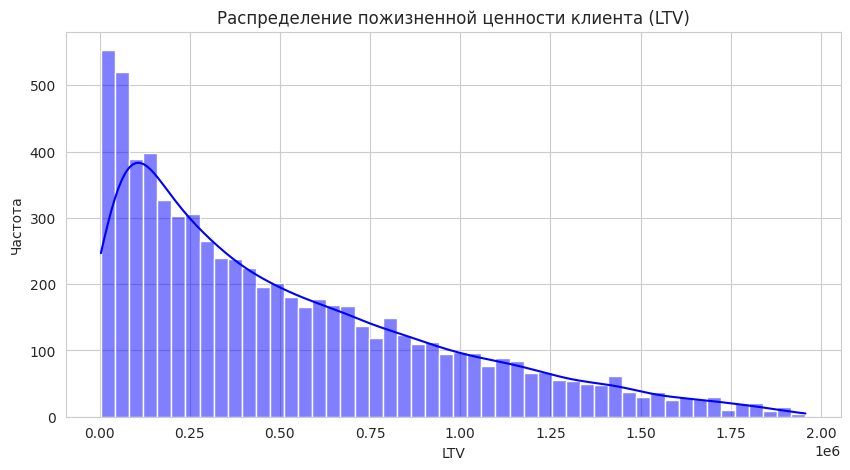

In [95]:
plt.figure(figsize=(10, 5))
sns.histplot(full_df[target], kde=True, bins=50, color='blue')
plt.title('Распределение пожизненной ценности клиента (LTV)')
plt.xlabel('LTV')
plt.ylabel('Частота')
plt.show()

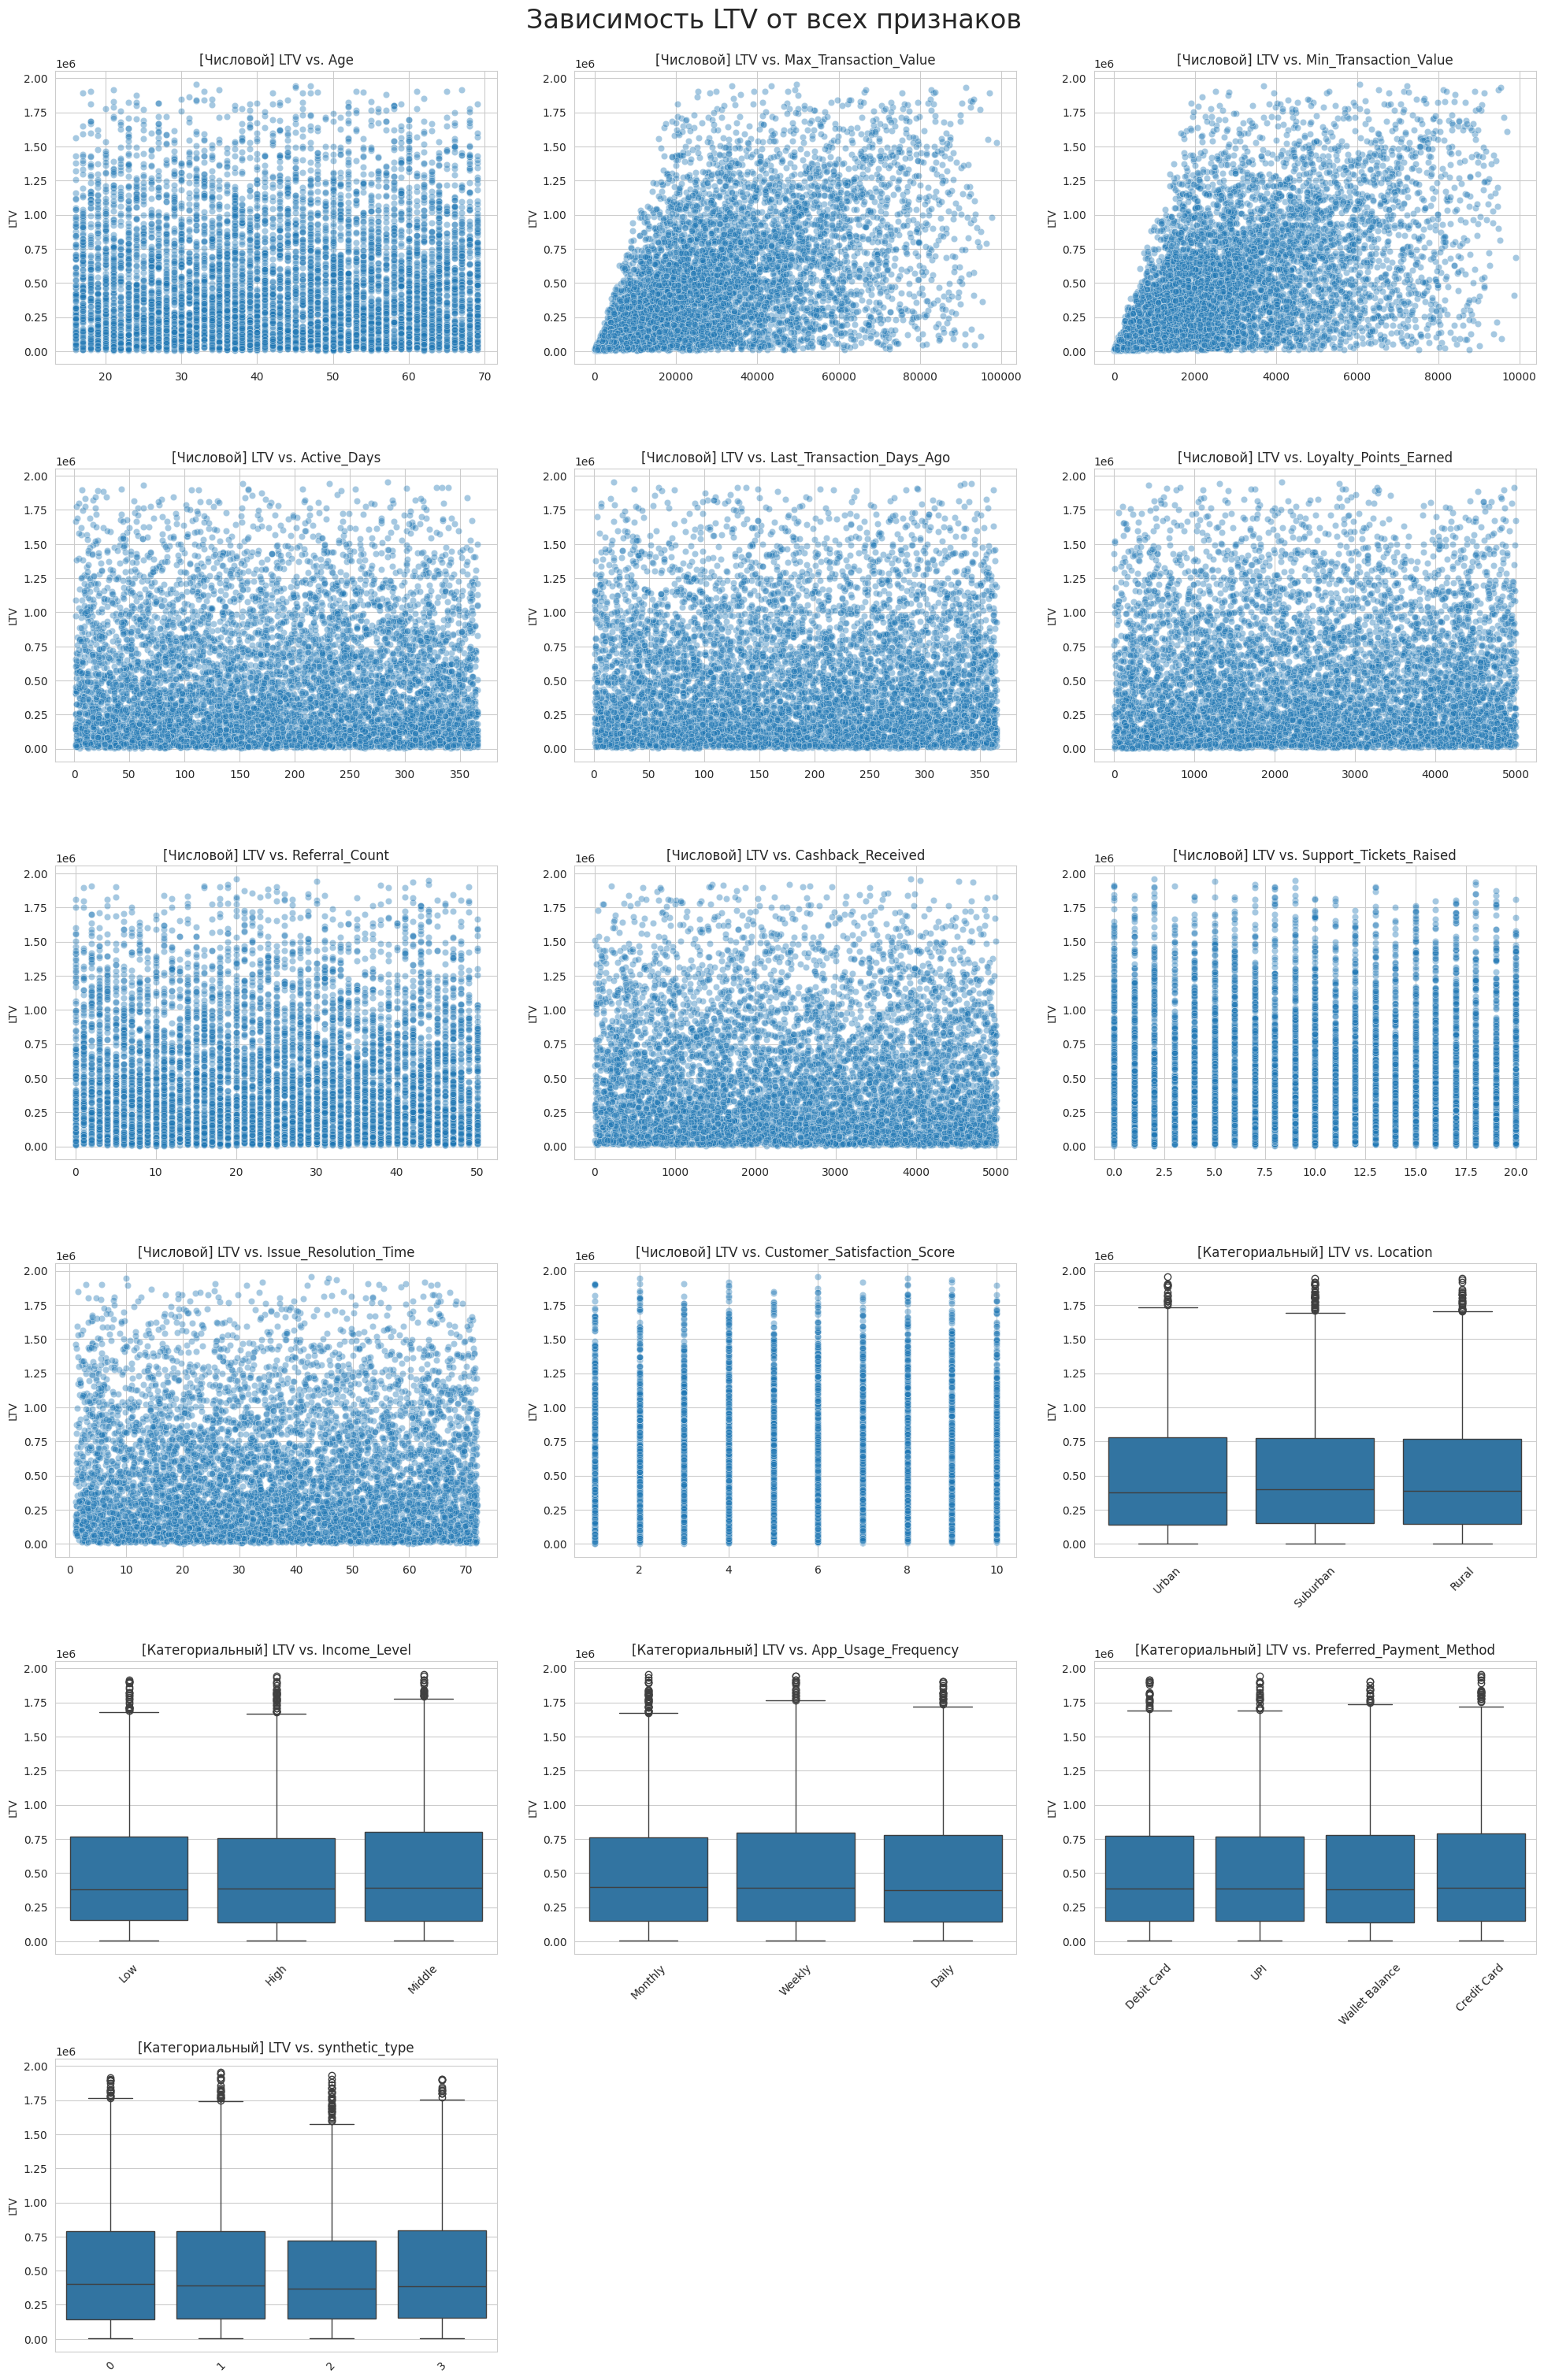

In [96]:
import math

# Все признаки, которые мы хотим проверить
all_features = numerical_features.tolist() + categorical_features.tolist()

n_features = len(all_features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

for i, feature in enumerate(all_features):
    # Если признак числовой, строим scatter plot
    if feature in numerical_features:
        sns.scatterplot(x=full_df[feature], y=full_df['LTV'], ax=axes[i], alpha=0.4)
        axes[i].set_title(f'[Числовой] LTV vs. {feature}', fontsize=12)
    # Если признак категориальный, строим box plot
    elif feature in categorical_features:
        sns.boxplot(x=full_df[feature], y=full_df['LTV'], ax=axes[i])
        axes[i].set_title(f'[Категориальный] LTV vs. {feature}', fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)

    axes[i].set_xlabel('') # Убираем подписи оси X для компактности

# Скрываем лишние пустые графики
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(pad=2.0)
plt.suptitle('Зависимость LTV от всех признаков', fontsize=24, y=1.01)
plt.show()

In [97]:
# Гребневая регрессия (Ridge Regression)
# Регрессор дерева решений (Decision Tree Regressor)
# Регрессор случайного леса (Random Forest Regressor)
# Регрессор Gradient Boosting (Gradient Boosting Regressor)
# Регрессор CatBoost (CatBoost Regressor)
# Ансамбль регрессоров (в виде VotingRegressor, который объединяет модели RandomForest, Gradient Boosting и CatBoost)

print("Начало обучения и оценки моделей ...")

# Список из 5 регрессоров
regressors_to_train = {
    "Гребневая регрессия": Ridge(random_state=42),
    "Регрессор дерева решений": DecisionTreeRegressor(random_state=42),
    "Регрессор случайного леса": RandomForestRegressor(random_state=42, n_jobs=-1),
    "Регрессор Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Регрессор CatBoost": CatBoostRegressor(random_state=42, verbose=0),
}

# Создание ансамбля (Voting Regressor)
ensemble_model = VotingRegressor(
    estimators=[
        ('rf', RandomForestRegressor(random_state=42, n_jobs=-1)),
        ('gb', GradientBoostingRegressor(random_state=42)),
        ('cat', CatBoostRegressor(random_state=42, verbose=0))
    ]
)

# Добавляем ансамбль в общий список для обучения
regressors_to_train["Voting Ensemble"] = ensemble_model

Начало обучения и оценки моделей ...


In [98]:
# Цикл обучения и оценки
results = []
for name, model in regressors_to_train.items():
    print(f"Обучение модели: {name}...")

    # Создаем полный пайплайн: предобработка -> модель
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])

    # Обучаем модель
    pipeline.fit(X_train, y_train)

    # Делаем предсказания
    y_pred = pipeline.predict(X_test)

    # Сохраняем метрики
    results.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2 Score": r2_score(y_test, y_pred)
    })

Обучение модели: Гребневая регрессия...
Обучение модели: Регрессор дерева решений...
Обучение модели: Регрессор случайного леса...
Обучение модели: Регрессор Gradient Boosting...
Обучение модели: Регрессор CatBoost...
Обучение модели: Voting Ensemble...


In [87]:
print("Результаты моделей ...")

# Создание и отображение DataFrame с результатами
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False).reset_index(drop=True)
print("Таблица с метриками всех моделей:")
display(results_df)

Результаты моделей ...
Таблица с метриками всех моделей:


,Model,MAE,MSE,R2 Score
0,Регрессор CatBoost,5090.681299,4.370682e+07,0.999776
1,Voting Ensemble,6021.640536,6.106491e+07,0.999686
2,Регрессор случайного леса,6471.848498,7.854655e+07,0.999597
3,Регрессор Gradient Boosting,13693.191743,3.105832e+08,0.998405
4,Регрессор дерева решений,15361.968275,4.721750e+08,0.997575
5,Гребневая регрессия,126326.126505,2.863020e+10,0.852957


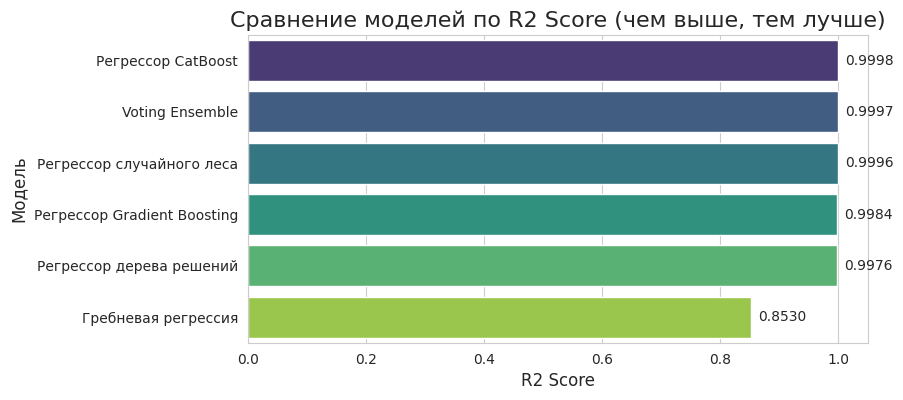

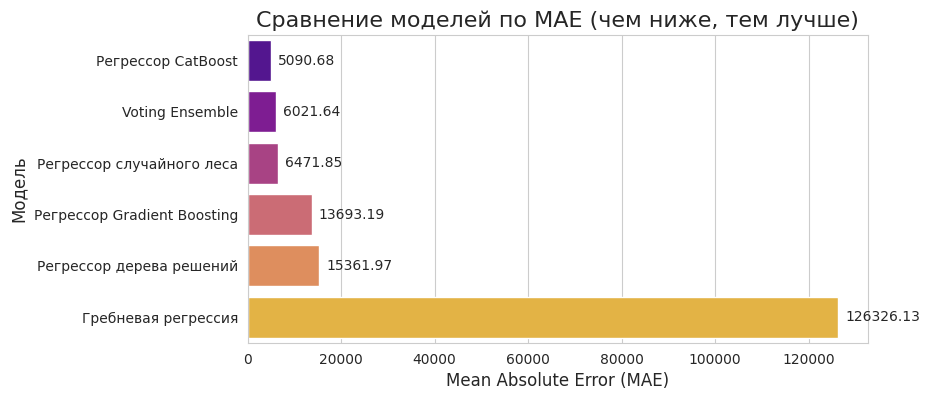

In [99]:
# Визуализация R2 Score
plt.figure(figsize=(8, 4))
ax = sns.barplot(x="R2 Score", y="Model", data=results_df, palette="viridis", hue="Model", legend=False)
plt.title('Сравнение моделей по R2 Score (чем выше, тем лучше)', fontsize=16)
plt.xlabel('R2 Score', fontsize=12)
plt.ylabel('Модель', fontsize=12)
plt.xlim(0, 1.05) # Шкала от 0 до 1
# Добавление меток со значениями
for p in ax.patches:
    ax.annotate(f'{p.get_width():.4f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')
plt.show()

# Визуализация MAE
mae_sorted_df = results_df.sort_values(by="MAE", ascending=True)
plt.figure(figsize=(8, 4))
ax = sns.barplot(x="MAE", y="Model", data=mae_sorted_df, palette="plasma", hue="Model", legend=False)
plt.title('Сравнение моделей по MAE (чем ниже, тем лучше)', fontsize=16)
plt.xlabel('Mean Absolute Error (MAE)', fontsize=12)
plt.ylabel('Модель', fontsize=12)
# Добавление меток со значениями
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')
plt.show()